In [24]:
import numpy
import matplotlib.pyplot as plt
import scipy.interpolate as spi
import sympy
import util

In [2]:
x1 = [0, 3, 5, 7, 9, 11, 12, 13, 14, 15]
y1 = [0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.4, 1.6]

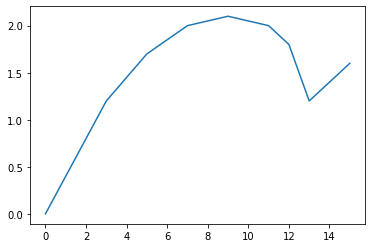

In [3]:
plt.plot(x1, y1)

In [15]:
# 拉格朗日插值
diff1 = util.lagrange_interpolation(x1, y1)
print(diff1)

-3.45491974956261e-6*x**9 + 0.000262112226397941*x**8 - 0.00847821304852558*x**7 + 0.152289374398749*x**6 - 1.65596508381665*x**5 + 11.1166836693399*x**4 - 44.7651620768863*x**3 + 98.2043579176278*x**2 - 88.7201747211122*x


In [14]:
# 获得x每增加0.5时y的值
x = sympy.symbols("x")
value1 = numpy.zeros((2, int(numpy.ceil(((max(x1) - min(x1)) / 0.5)))))
print(value1.shape)

(2, 30)


In [16]:
x2 = 0
for i in range(value1.shape[1]):
    value1[0][i] = x2
    value1[1][i] = diff1.evalf(subs={x:x2})
    x2 = x2 + 0.5
print(value1)

[[  0.           0.5          1.           1.5          2.
    2.5          3.           3.5          4.           4.5
    5.           5.5          6.           6.5          7.
    7.5          8.           8.5          9.           9.5
   10.          10.5         11.          11.5         12.
   12.5         13.          13.5         14.          14.5       ]
 [  0.         -24.75928502 -25.67619048 -17.90325479  -9.14151786
   -2.55663714   1.2          2.66011508   2.72376374   2.21642216
    1.7          1.44398704   1.48463412   1.71931354   2.
    2.20416036   2.27323926   2.2183773    2.1          1.99246799
    1.94708312   1.96640012   2.           1.96663956   1.8
    1.50511876   1.2          1.10186276   1.4          1.93728763]]


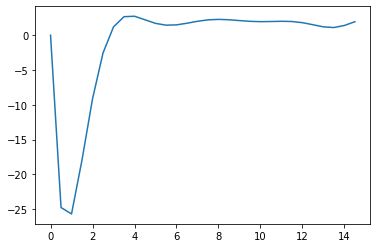

In [17]:
plt.plot(value1[0], value1[1])

In [20]:
# 牛顿插值
diff2 = util.get_diff_quotient(5, x1, y1)
# 牛顿插值多项式
ploy1 = diff2[0][0] + diff2[1][1] * (x - x1[0]) +\
        diff2[2][2] * (x - x1[0]) * (x - x1[1]) +\
        diff2[3][3] * (x - x1[0]) * (x - x1[1]) * (x - x1[2]) +\
        diff2[4][4] * (x - x1[0]) * (x - x1[1]) * (x - x1[2]) * (x - x1[3]) +\
        diff2[5][5] * (x - x1[0]) * (x - x1[1]) * (x - x1[2]) * (x - x1[3]) * (x - x1[4])
ploy1 = sympy.expand(ploy1)
print(ploy1)

7.21500721500716e-6*x**5 - 0.000252525252525251*x**4 + 0.00339105339105338*x**3 - 0.0467171717171717*x**2 + 0.515865800865801*x


In [22]:
# 获得x每增加0.5时y的值
value2 = numpy.zeros((2, int(numpy.ceil(((max(x1) - min(x1)) / 0.5)))))
x2 = 0
for i in range(value2.shape[1]):
    value2[0][i] = x2
    value2[1][i] = ploy1.evalf(subs={x:x2})
    x2 = x2 + 0.5
print(value2)

[[ 0.          0.5         1.          1.5         2.          2.5
   3.          3.5         4.          4.5         5.          5.5
   6.          6.5         7.          7.5         8.          8.5
   9.          9.5        10.         10.5        11.         11.5
  12.         12.5        13.         13.5        14.         14.5       ]
 [ 0.          0.24666193  0.47229437  0.67890625  0.86818182  1.04150771
   1.2         1.34453125  1.47575758  1.5941457   1.7         1.79348958
   1.87467532  1.94353693  2.          2.04396307  2.07532468  2.09401042
   2.1         2.0933543   2.07424242  2.04296875  2.          1.94599229
   1.88181818  1.80859375  1.72770563  1.64083807  1.55        1.45755208]]


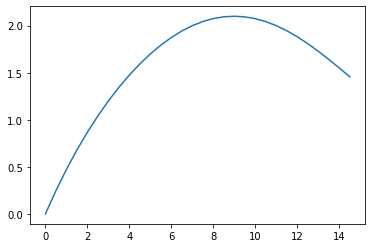

In [23]:
plt.plot(value2[0], value2[1])

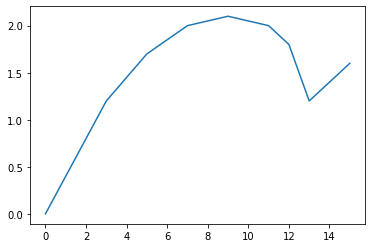

In [26]:
# 三次样条插值
ipo = spi.splrep(x1, y1, k=3)
iy = spi.splev(x1, ipo)
plt.plot(x1, iy)